In [1]:

from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [20]:
#import libraries
import pandas as pd
import numpy as np
import sklearn as sk
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor

In [3]:
#read Data
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
print(f" train head is:", df_train.head())
print(f" test head is:", df_test.head())

 train head is:    Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2

In [4]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

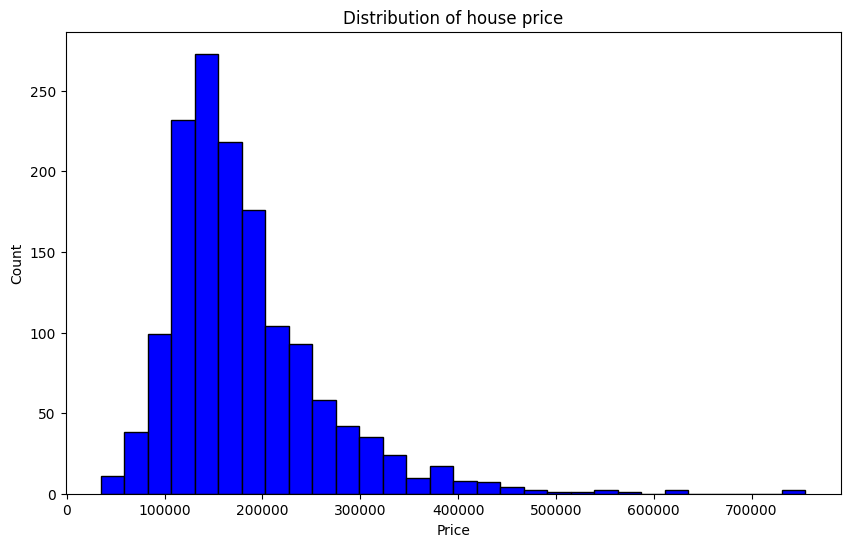

In [5]:
#ploting distributuin
df_train.drop('Id', axis=1, inplace=True)
df_test.drop('Id', axis=1, inplace=True)
plt.figure(figsize=(10,6))
plt.hist(df_train['SalePrice'], bins=30, color ='blue', edgecolor='black')
plt.title('Distribution of house price')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

In [6]:
#Correlation between numerical features and target
numeric_features=df_train.select_dtypes(include=['int64','float64'])
correlation_matrix = numeric_features.corr()
correlation_with_target = correlation_matrix['SalePrice'].sort_values(ascending=False)
print(correlation_with_target)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


Text(0, 0.5, 'Correlation')

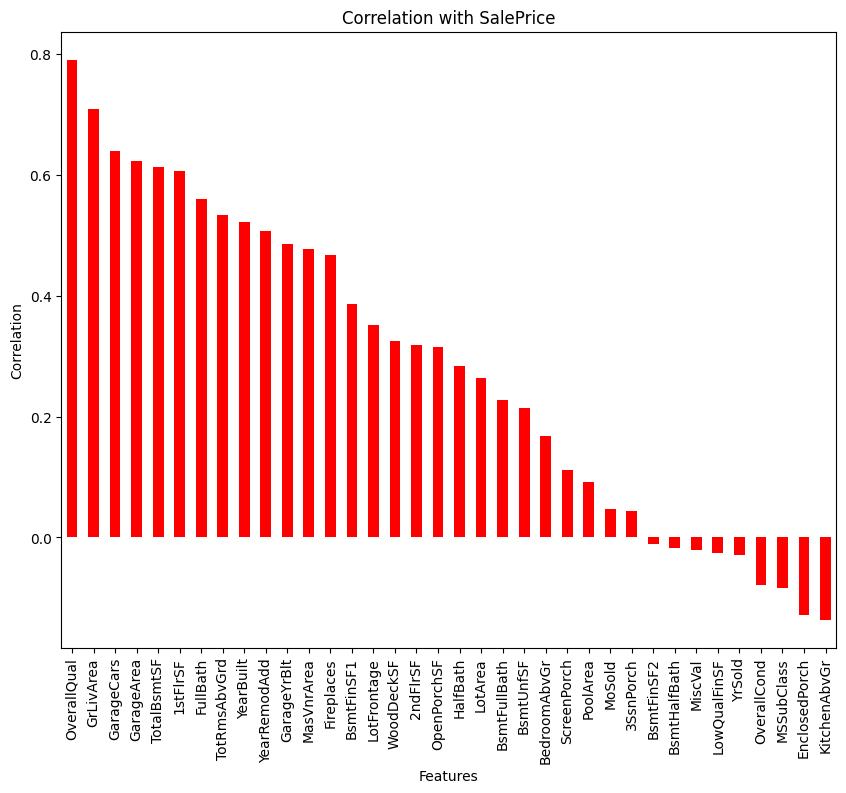

In [7]:
#visualize correlation
plt.figure(figsize=(10,8))
correlation_with_target.drop('SalePrice').plot(kind='bar', color='red')
plt.title('Correlation with SalePrice')
plt.xlabel('Features')
plt.ylabel('Correlation')


In [8]:
#statistical parameters
from IPython.display import display


mean_price = df_train['SalePrice'].mean()
median_price = df_train['SalePrice'].median()
mode_price = df_train['SalePrice'].mode()[0]
std_price = df_train['SalePrice'].std()
var_price = df_train['SalePrice'].var()
min_price = df_train['SalePrice'].min()
max_price = df_train['SalePrice'].max()
range_price = max_price - min_price
q1 = df_train['SalePrice'].quantile(0.25)
q3 = df_train['SalePrice'].quantile(0.75)
iqr = q3 - q1
skewness = df_train['SalePrice'].skew()
kurtosis = df_train['SalePrice'].kurt()

stats = ({
     'statistics':[
         'Mean', 'Median', 'Mode', 'Standard Deviation','Variance',
                   'Minimum','Maximum', 'Range','Q1 (25th percentile)', 'Q3 (75th percentile)',
                   'IQR','Skewness','Kurtosis'
                   ],
     'Value':[
         mean_price,median_price,mode_price,std_price,var_price,
         min_price,max_price,range_price, q1, q3, iqr , skewness, kurtosis
         ]
})
stats_table = pd.DataFrame(stats)
display(stats_table)


,statistics,Value
0,Mean,1.809212e+05
1,Median,1.630000e+05
2,Mode,1.400000e+05
3,Standard Deviation,7.944250e+04
4,Variance,6.311111e+09
5,Minimum,3.490000e+04
6,Maximum,7.550000e+05
7,Range,7.201000e+05
8,Q1 (25th percentile),1.299750e+05
9,Q3 (75th percentile),2.140000e+05


Median(1.630000e+05
) is less than Mean (1.809212e+05) and skewness is equal to 1.8 which indicates positive skewness.
Also Range is 7.201000e+05 which is large.
in addition, kurtosis is equal to 6, which is called lepokurtic.
in conclusion, these three parameters indicate the existence of outliers. so in the following we detect outliers to manage them.


In [9]:
#calculating outliers
lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr
print(f"lower bound :{lower_bound}")
print(f"upper bound :{upper_bound}")
outliers = df_train[(df_train['SalePrice']<lower_bound) | (df_train['SalePrice']>upper_bound)]
print(f"number of outliers is:{len(outliers)}")

lower bound :3937.5
upper bound :340037.5
number of outliers is:61


In [10]:
column_types_counts = df_train.dtypes.value_counts()
print(column_types_counts)

object     43
int64      34
float64     3
Name: count, dtype: int64


Creating aggregated feature like TotalSF and TotalBathrooms can enhance model performance by reducing dimentionality and make pattern easier to learn. also, these features often correlate strongly with house price.

In [11]:
#making sure if test data has missing values?
test_missing_values=df_test.isnull().sum()
test_missing_values=test_missing_values[test_missing_values>0]
print(test_missing_values)


MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64


So test data has missing value. we should fill them with the amounts we filled train data to prevent data leakage. Also Encode categorical variables using the same encoder objects used for the training data.


In [12]:
fill_values = {}
for col in df_train.columns:
    if df_train[col].dtype in ['int64', 'float64']:
        fill_values[col] = df_train[col].median()  # or mean
    elif df_train[col].dtype == 'object':
        fill_values[col] = 'missing'

In [13]:
#Data Cleaning
#handling missing values
missing_values= df_train.isnull().sum()
missing_values=missing_values[missing_values>0]
print(missing_values)

#filling missing values in train and test
df_train = df_train.fillna(fill_values)
df_test = df_test.fillna(fill_values)


print(df_train.isnull().sum())
print(df_test.isnull().sum())

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
Length: 79, dtype: int64


In [16]:
#Data Preparation
from sklearn.preprocessing import LabelEncoder

df_combined = pd.concat([df_train, df_test], axis=0)

# Step 3: Convert all categorical columns to string type to avoid mixed data types
for col in df_combined.select_dtypes(include='object').columns:
    df_combined[col] = df_combined[col].astype(str)

# Step 4: Apply label encoding on the combined dataset
label_encoders = {}
for col in df_combined.select_dtypes(include='object').columns:
    le = LabelEncoder()

    # Fit the encoder on the combined dataset
    df_combined[col] = le.fit_transform(df_combined[col])

    # Store the label encoder for later use
    label_encoders[col] = le

# Step 5: Separate the datasets back
df_train_encoded = df_combined[:len(df_train)]
df_test_encoded = df_combined[len(df_train):]


In [42]:
df_test_encoded=df_test_encoded.drop('SalePrice', axis=1)
print(df_test_encoded.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [18]:
#splitting dataset
X= df_train_encoded.drop('SalePrice', axis=1)
y = df_train_encoded['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Tuning hyperparameter
from sklearn.model_selection import RandomizedSearchCV

models_and_params = {
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10]
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            'alpha': [0.01, 0.1, 1, 10, 100]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(random_state=42),
        "params": {
            'n_estimators': [100, 200, 300],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 10],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
    }
}

# Loop through models for hyperparameter tuning
best_estimators = {}
results = []

for model_name, model_info in models_and_params.items():
    print(f"Tuning {model_name}...")

    # Initialize RandomizedSearchCV
    search = RandomizedSearchCV(
        estimator=model_info["model"],
        param_distributions=model_info["params"],
        scoring='neg_mean_squared_error',
        cv=5,
        n_iter=10,
        random_state=42,
        n_jobs=-1
    )

    # Fit the model
    search.fit(X_train, y_train)

    # Best estimator and parameters
    best_estimators[model_name] = search.best_estimator_
    best_params = search.best_params_

    # Evaluate on the test set
    y_pred = search.best_estimator_.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store results
    results.append({
        "Model": model_name,
        "Best Parameters": best_params,
        "MSE": mse,
        "R² Score": r2
    })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)


Tuning Decision Tree...
Tuning Random Forest...
Tuning Gradient Boosting...
Tuning Lasso...


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.902e+10, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


Tuning XGBoost...
               Model                                    Best Parameters  \
0      Decision Tree  {'min_samples_split': 10, 'min_samples_leaf': ...   
1      Random Forest  {'n_estimators': 300, 'min_samples_split': 2, ...   
2  Gradient Boosting  {'n_estimators': 300, 'max_depth': 3, 'learnin...   
3              Lasso                                     {'alpha': 100}   
4            XGBoost  {'subsample': 1.0, 'n_estimators': 300, 'max_d...   

            MSE  R² Score  
0  1.716988e+09  0.776152  
1  8.048747e+08  0.895066  
2  7.702118e+08  0.899586  
3  1.178381e+09  0.846371  
4  7.209749e+08  0.906005  


In [33]:
#finding the best alpha for LASSO
from sklearn.model_selection import GridSearchCV

param_grid = {'alpha': [0.01, 0.1, 1, 10, 100,1000]}  # Define a range of alpha values
grid_search = GridSearchCV(
    Lasso(random_state=42),
    param_grid,
    scoring='neg_mean_squared_error',
    cv=5
)
grid_search.fit(X_train, y_train)

print(f"Best Alpha: {grid_search.best_params_['alpha']}")
print(f"Best Cross-Validation MSE: {abs(grid_search.best_score_):.2f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.975e+10, tolerance: 5.720e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.718e+10, tolerance: 5.716e+08
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.976e+10, tolerance: 5.720e

Best Alpha: 1000
Best Cross-Validation MSE: 1333226351.56


In [32]:
#Check model's performance with cross validation
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import make_scorer, mean_squared_error

lasso_model = Lasso(alpha=1000, random_state=42)  # Adjust alpha as needed
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation

# Use cross_val_score to calculate the scores
mse_scores = cross_val_score(
    lasso_model,
    X_train,
    y_train,
    scoring="r2",
    cv=kf
)

# Calculate the mean and standard deviation of the MSE
mean_mse = np.mean(mse_scores)
std_mse = np.std(mse_scores)

print(f"Cross-Validation Mean r2: {mean_mse:.2f}")
print(f"Cross-Validation MSE Std Dev: {std_mse:.2f}")

Cross-Validation Mean r2: 0.80
Cross-Validation MSE Std Dev: 0.08


In [36]:
print(df_test_encoded.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

Now training whole train data set with the LASSO and predict test dataset prices.

In [45]:
X_train = df_train_encoded.drop('SalePrice', axis=1)
y_train = df_train_encoded['SalePrice']
X_test = df_test_encoded
X_test = X_test[X_train.columns]

lasso = Lasso(alpha=1000)
lasso.fit(X_train, y_train)

# Predict on the test dataset
test_predictions = lasso.predict(X_test)

# save predictions
predictions_df = pd.DataFrame({ 'SalesPrice': test_predictions})
predictions_df = predictions_df.iloc[1:]
predictions_df.to_csv('lasso_predictions.csv', index=False)

print("Training on the full dataset is complete. Predictions saved!")


Training on the full dataset is complete. Predictions saved!


In [46]:

from google.colab import files
files.download('lasso_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[<Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>,
        <Axes: title={'center': 'TotalBsmtSF'}>],
       [<Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>,
        <Axes: title={'center': 'BsmtHalfBath'}>],
       [<Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,
        <Axes: title={'center': 'Bedroo

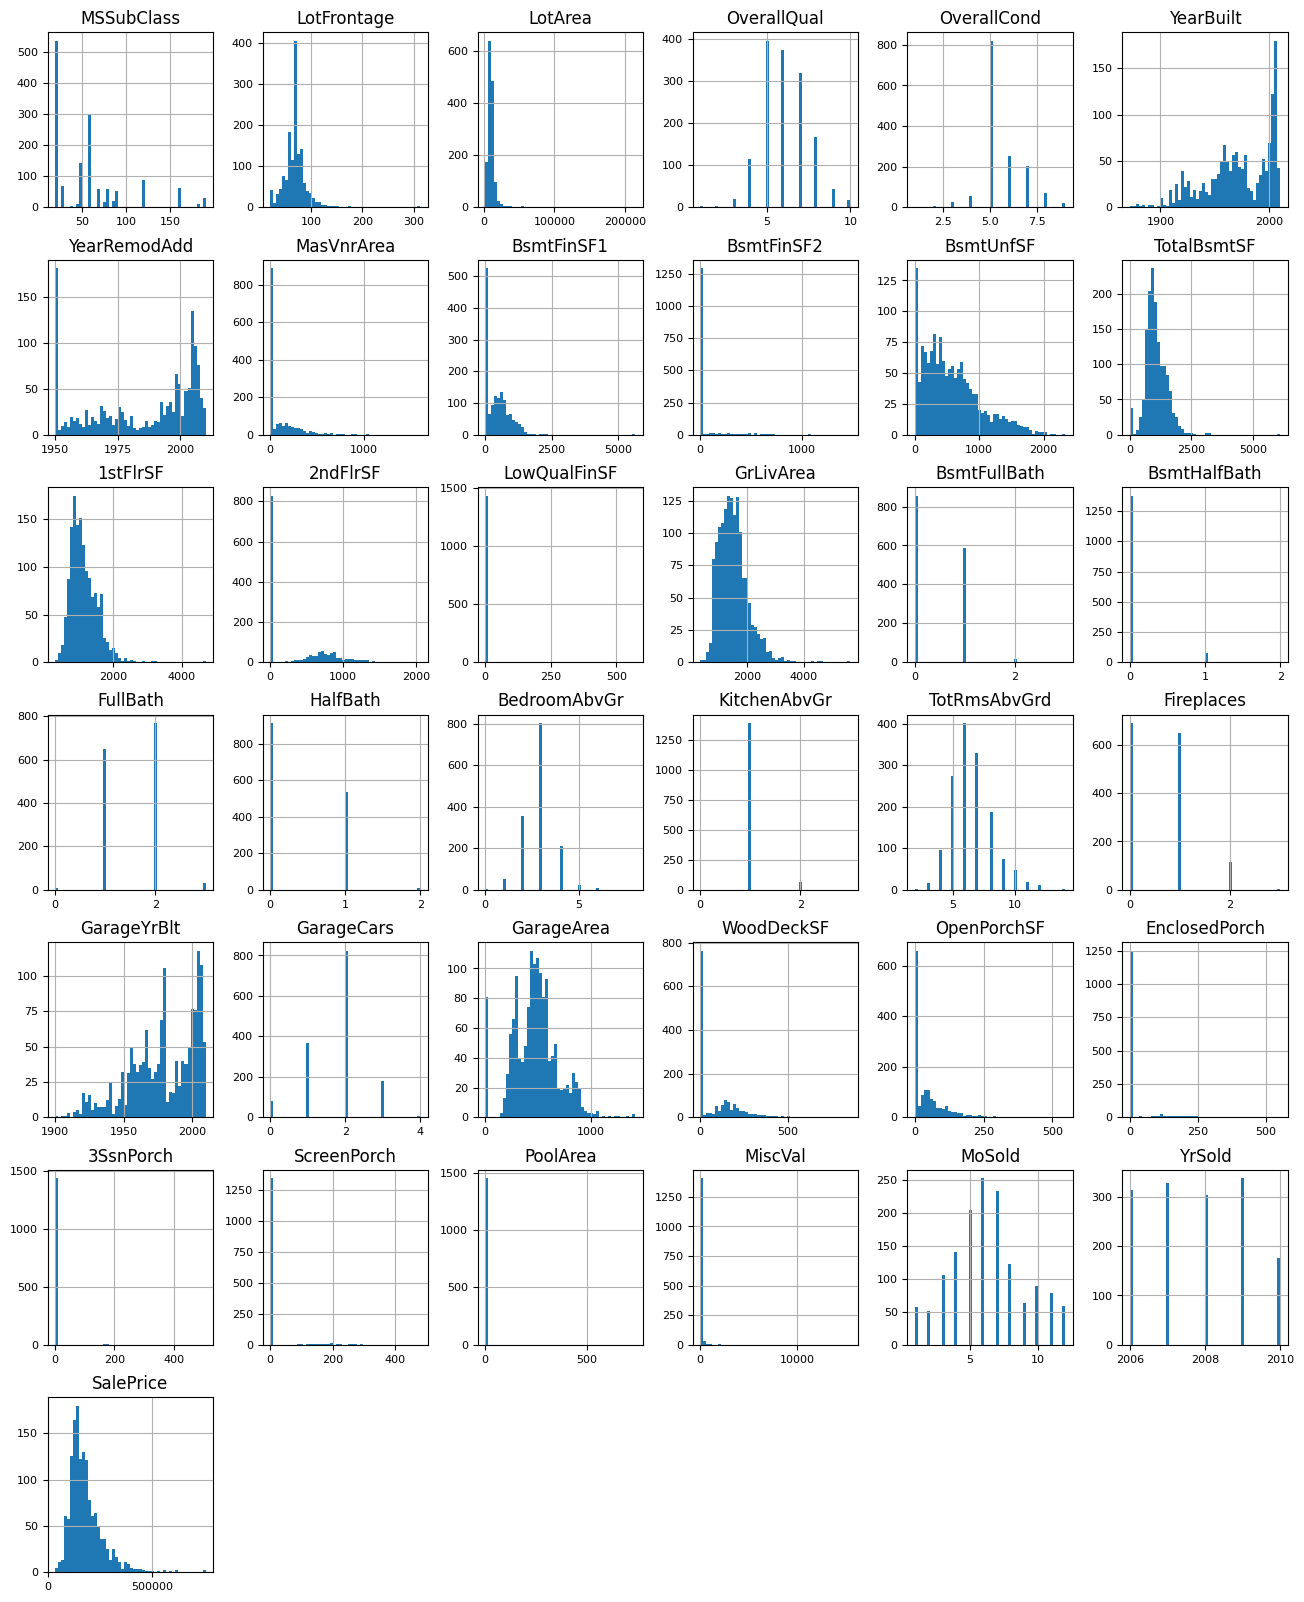

In [ ]:
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

<Axes: ylabel='SalePrice'>

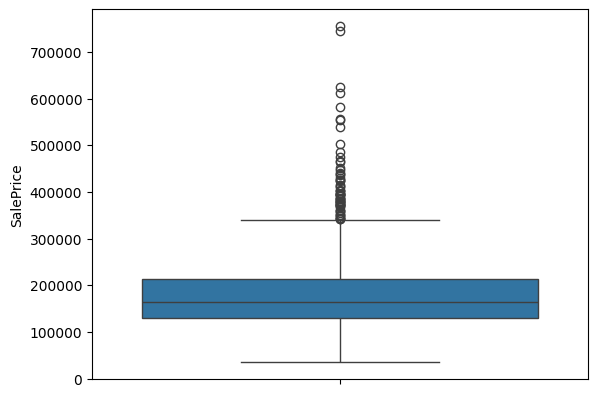

In [ ]:
import seaborn as sns
sns.boxplot(df['SalePrice'])

as outliers are meaningful, we better use log transformation or RobustScaler normalization.
I am using tree based model (Random Forest, gradient boosting) so I do not normalize as these models can handle raw data directly.
Then I will use other linear regression models, as the target is right skewed, I will normalize the price.